<img src="https://miro.medium.com/max/324/1*9vX9GriIxB3yRXYtoEiy8w.jpeg">

<h1>Email SPAM Detection Project</h1>


***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('email_spam.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


<h2>Start of EDA process</h2>

In [3]:
df.shape

(2893, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [5]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

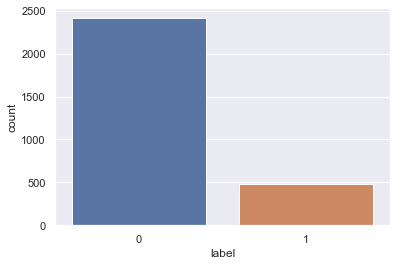

In [6]:
sns.countplot(df['label'])

We can see that out of 2893 mails 481 mails are spam

As many of the emails missing subject and we are going mainly focus on the body of the mail, I am going to drop that column

***Dropping subject column***

In [7]:
df.drop(['subject'],axis=1,inplace=True)

In [8]:
df.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


***Ratio of spam and ham***

In [9]:
print ('spam ratio = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print ('ham ratio  = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


17% of the mails received are spam

***Checking total number of letters in each mail***

Inserting new column which will indicate the length of each mail, doing this for comparison with cleaned data

In [10]:
df['length_original'] = df.message.str.len()
df.head()

,message,label,length_original
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


<h2>Cleaning data</h2>

**Converting all letter in mail to lower case**

In [11]:
df['message'] = df['message'].str.lower()

**Replacing email addresses in the mail body with word 'emailid'**

In [12]:
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailid')


**Replacing URL's in the mail body with word 'url'**

In [13]:
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','url')

**Replacing numbers in the mail body with word 'number'**


In [14]:
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

**Removing leading and trailing whitespace**


In [15]:
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

**Replacing 10 digit phone numbers of all kind with word 'phone'**


In [16]:
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phone')

**Replacing whitespace between words with a single space**


In [17]:
df['message'] = df['message'].str.replace(r'\s+', ' ')

**Replacing money symbols with word 'money'**

In [18]:
df['message'] = df['message'].str.replace(r'£|\$', 'money')

**Removing punctuation**

In [19]:
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
df['message'] = df['message'].str.replace(r'[_]', '')

**Removing stop words**

In [20]:
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english')+['u','b','c','n','v','see','go'])
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [21]:
df['length_cleaned'] = df.message.str.len()
df.head()

,message,label,length_original,length_cleaned
0,content length number apple iss research cente...,0,2856,2048
1,lang classification grimes joseph e barbara f ...,0,1800,1469
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1080
3,colleague researching differing degrees risk p...,0,324,208
4,earlier morning phone friend mine living south...,0,1046,623


In [22]:
print ('Original Length', df.length_original.sum())
print ('Length after cleaning', df.length_cleaned.sum())

Original Length 9344743
Length after cleaning 6663606


Number of characters removed after cleaning the data

In [23]:
(df.length_original.sum())-(df.length_cleaned.sum())

2681137

<h2>Generating a word cloud for data visualization of frequently repeating words</h2>

***For SPAM***

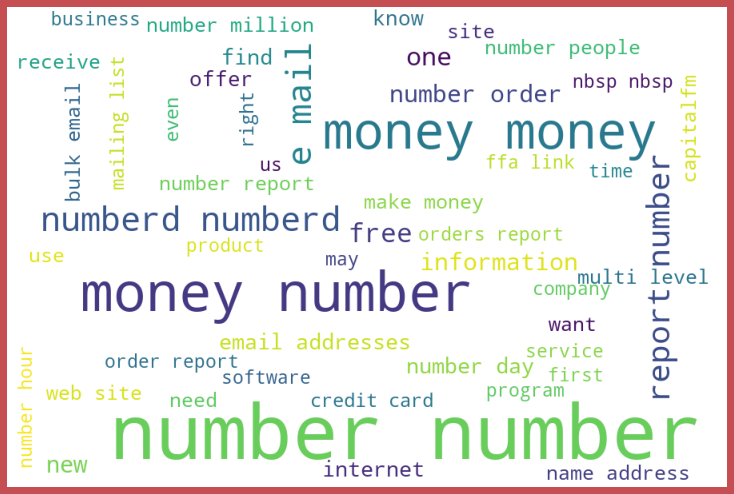

In [24]:
from wordcloud import WordCloud
spams = df['message'][df['label']==1]
spam_cloud = WordCloud(width=900,height=600,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

***For HAM***

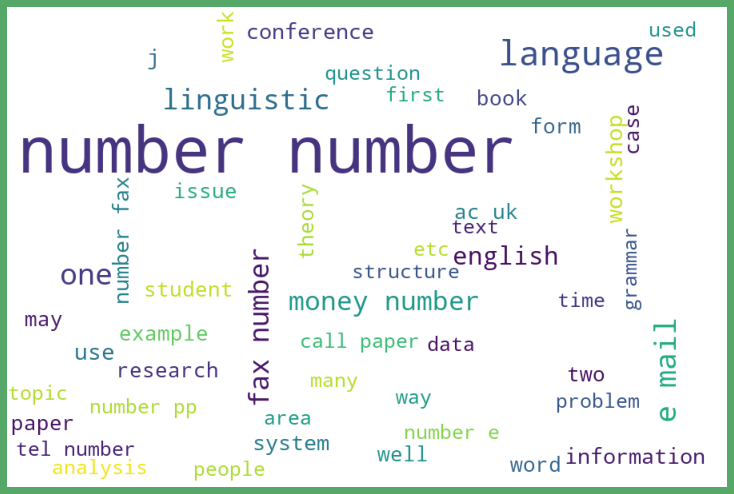

In [25]:
hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=900,height=600,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h2>Feature Extraction</h2>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['message'])
x = features
y = df['label']

<h2>Start of Machine Learning Process</h2>

***Lets import required packages***

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [28]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
MNB=MultinomialNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [29]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', MNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

***Lets split our data randomly and see which model works better***

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier()


Accuracy_score =  0.9792746113989638


Cross_Val_Score =  0.9681971125164062


roc_auc_score =  0.9674475262368815


classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.95      0.95      0.95       115

    accuracy                           0.98       579
   macro avg       0.97      0.97      0.97       579
weighted avg       0.98      0.98      0.98       579



[[458   6]
 [  6 109]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


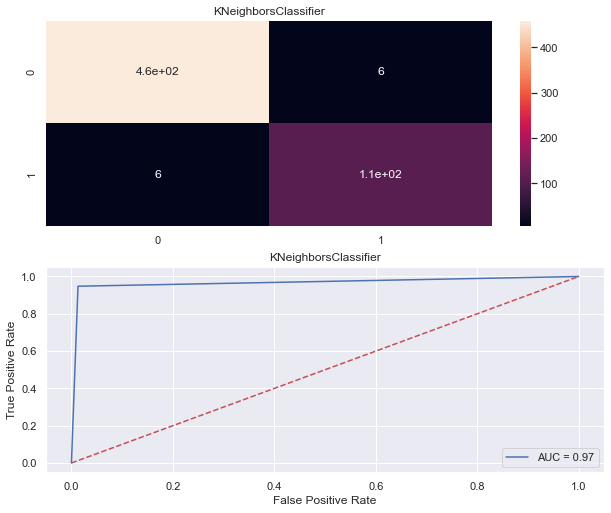




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.9740932642487047


Cross_Val_Score =  0.9747679274549576


roc_auc_score =  0.9380528485757121


classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       464
           1       0.99      0.88      0.93       115

    accuracy                           0.97       579
   macro avg       0.98      0.94      0.96       579
weighted avg       0.97      0.97      0.97       579



[[463   1]
 [ 14 101]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


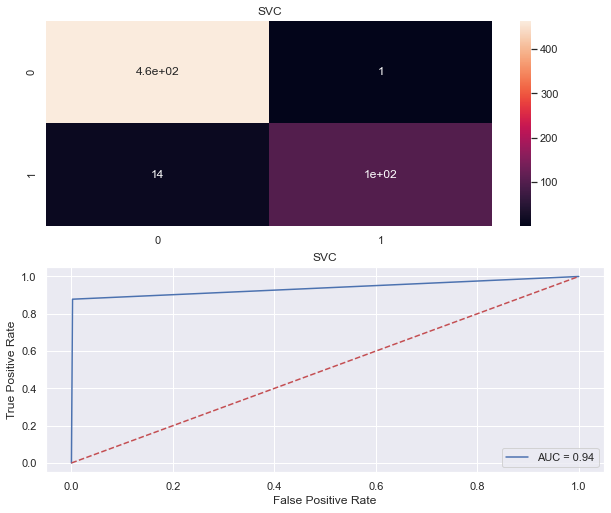




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.9516407599309153


Cross_Val_Score =  0.95333015153323


roc_auc_score =  0.8815311094452773


classification_report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       464
           1       0.99      0.77      0.86       115

    accuracy                           0.95       579
   macro avg       0.97      0.88      0.92       579
weighted avg       0.95      0.95      0.95       579



[[463   1]
 [ 27  88]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


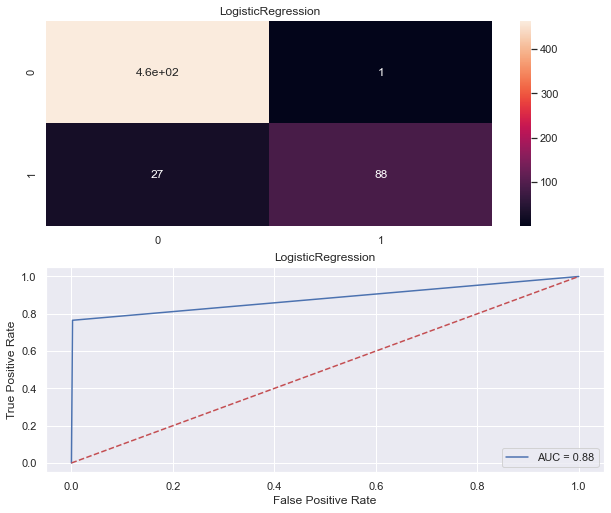




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=56)


Accuracy_score =  0.9637305699481865


Cross_Val_Score =  0.9502195442071353


roc_auc_score =  0.9512087706146926


classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       464
           1       0.89      0.93      0.91       115

    accuracy                           0.96       579
   macro avg       0.94      0.95      0.94       579
weighted avg       0.96      0.96      0.96       579



[[451  13]
 [  8 107]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


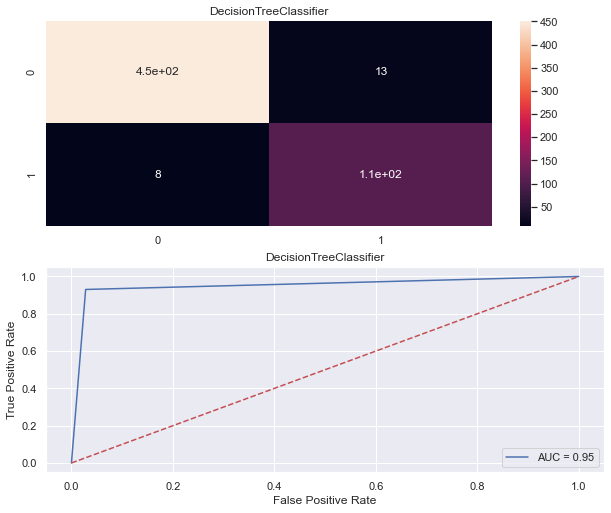




*-----------------------------* MultinomialNB *------------------------------*


MultinomialNB()


Accuracy_score =  0.8255613126079447


Cross_Val_Score =  0.8596575587638705


roc_auc_score =  0.5608695652173913


classification_report
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       464
           1       1.00      0.12      0.22       115

    accuracy                           0.83       579
   macro avg       0.91      0.56      0.56       579
weighted avg       0.86      0.83      0.77       579



[[464   0]
 [101  14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


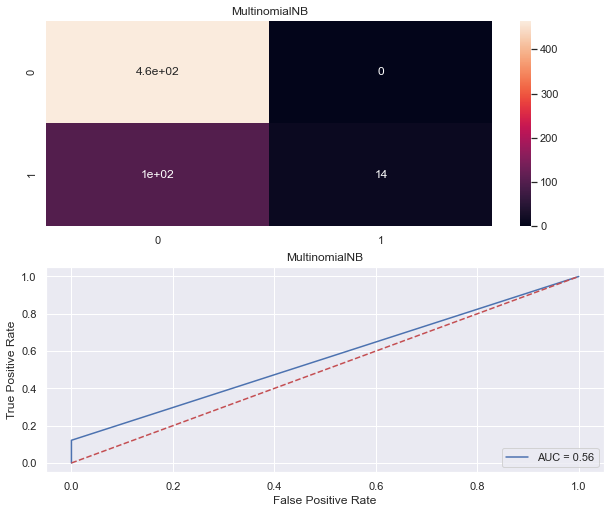




*-----------------------------* RandomForestClassifier *------------------------------*


RandomForestClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.9758203799654577


Cross_Val_Score =  0.9723517480014318


roc_auc_score =  0.9391304347826087


classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       464
           1       1.00      0.88      0.94       115

    accuracy                           0.98       579
   macro avg       0.99      0.94      0.96       579
weighted avg       0.98      0.98      0.98       579



[[464   0]
 [ 14 101]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


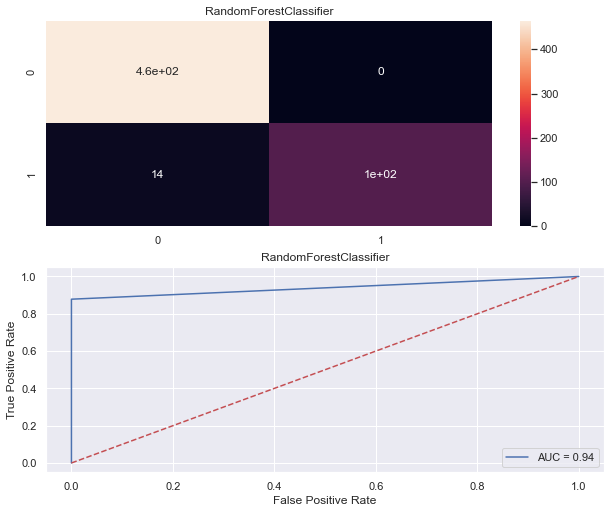




*-----------------------------* GradientBoostingClassifier *------------------------------*


GradientBoostingClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.9792746113989638


Cross_Val_Score =  0.9733874239350913


roc_auc_score =  0.9543665667166417


classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       464
           1       0.98      0.91      0.95       115

    accuracy                           0.98       579
   macro avg       0.98      0.95      0.97       579
weighted avg       0.98      0.98      0.98       579



[[462   2]
 [ 10 105]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


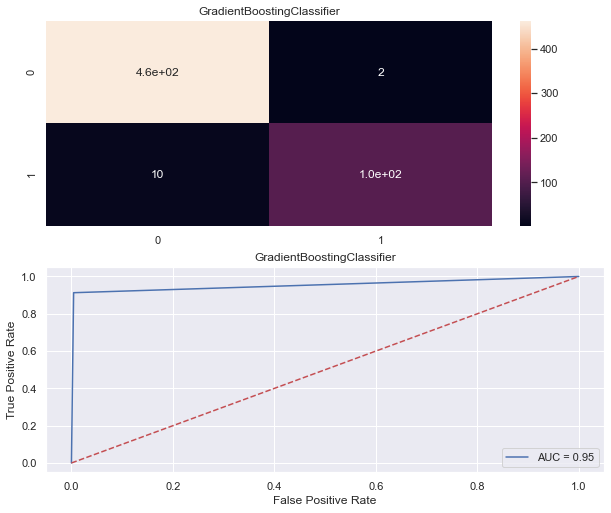




*-----------------------------* ExtraTreesClassifier *------------------------------*


ExtraTreesClassifier(random_state=56)


Accuracy_score =  0.9706390328151986


Cross_Val_Score =  0.9695788092113113


roc_auc_score =  0.9260869565217391


classification_report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       464
           1       1.00      0.85      0.92       115

    accuracy                           0.97       579
   macro avg       0.98      0.93      0.95       579
weighted avg       0.97      0.97      0.97       579



[[464   0]
 [ 17  98]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


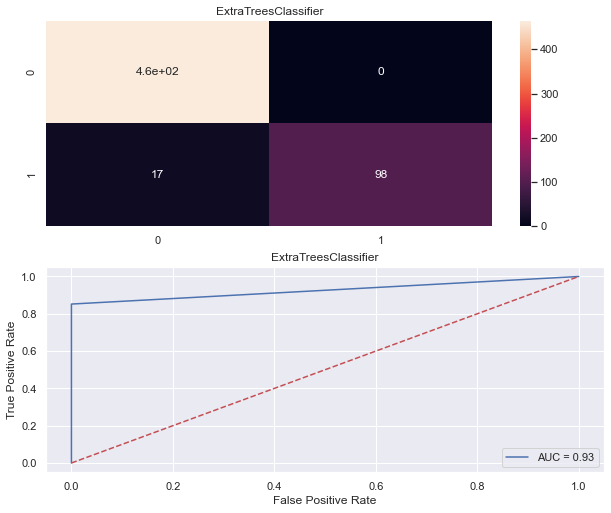




*-----------------------------* AdaBoostClassifier *------------------------------*


AdaBoostClassifier(random_state=56)


Accuracy_score =  0.9844559585492227


Cross_Val_Score =  0.9799522729984489


roc_auc_score =  0.9739505247376312


classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.96      0.96      0.96       115

    accuracy                           0.98       579
   macro avg       0.98      0.97      0.98       579
weighted avg       0.98      0.98      0.98       579



[[460   4]
 [  5 110]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


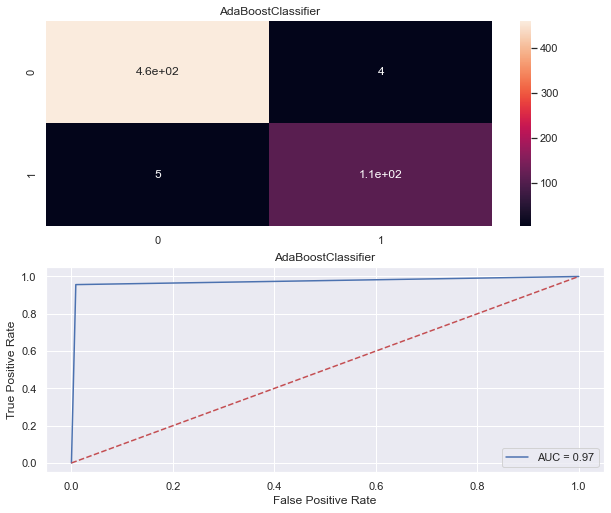

In [31]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [32]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,97.927461,96.819711,96.744753
1,SVC,97.409326,97.476793,93.805285
2,LogisticRegression,95.164076,95.333015,88.153111
3,DecisionTreeClassifier,96.373057,95.021954,95.120877
4,MultinomialNB,82.556131,85.965756,56.086957
5,RandomForestClassifier,97.582038,97.235175,93.913043
6,GradientBoostingClassifier,97.927461,97.338742,95.436657
7,ExtraTreesClassifier,97.063903,96.957881,92.608696
8,AdaBoostClassifier,98.445596,97.995227,97.395052


**We can observe that AdaBoostClassifier gave highest accuracy with great cross validation score and roc auc curve, hence I amgoing to choose that as an final model**

<h2>End of Machine learning Process</h2>


<img src="https://miro.medium.com/max/875/0*mbFBPcPUJD-53v3h.png">

<h1>Now lets save our final model</h1>

In [33]:
import joblib
joblib.dump(ABC,'Email_spam_detection.pkl')

['Email_spam_detection.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">